# Analysis of Stack Overflow Survey


## Table of Contents
- [Introduction](#intro)
- [1. Business Understanding](#business_understanding)
- [2. Data Understanding](#data_understanding)
- [3. Data Preparation](#data_preparation)
- [4. Modeling](#c)
- [5. Evaluation](#evaluation)
- [6. Deployment](#deployment)


<a id='intro'></a>
## Introduction

This project is an analysis of the Stack Overflow Survey held during multiple years. Main goal of this project is to follow through the complete Cross-Industry Standard Process for Data Mining. 


<a id='business_understanding'></a>
## 1. Business Understanding

In this section we want to understand the problem.  
Questions:  
1. Statistics
    - How many people did take part at the survey and what does this say about the popularity of Stack Overflow? Change 2019 to 2020?
    - How did age of survey contestents change over time?
    - Gender over time and Germany compared to rest of world
    
    
    - How did the preferences in programming language change over time?
    - How much do people of each programming language earn?
   
    - IDE, OpenSource, Version Control, FrameWork, DataBase, Platform
    - What is the most popular programming language in the world compared to Germany?
    

    - How differ coding experience, language preferences, roles, age and salary among available countries.

2. Machine Learning
    - Anything we can predict? Happyness?

problematic, because columns change every year:
- How did this change over time?
- Are there improvement in gender equality and representation of minorities over the course of time?



<a id='data_understanding'></a>
## 2. Data Understanding

Interesting columns:
- Years since learning to code
- Years Coding Professionaly
- Databases
- Frameworks, Libraries and Tools
- Programming, Scripting and Markup Languages
- Career Satisfaction / Job Satisfaction
- 

#### Import external libraries

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score, mean_squared_error
from collections import Counter
%matplotlib inline

### 2.1 Gather data

#### Read data from csv-file

In [2]:
# Import data from local csv to pandas dataframe

df_2019_survey = pd.read_csv('./Data/developer_survey_2019/survey_results_public.csv')
df_2019_schema = pd.read_csv('./Data/developer_survey_2019/survey_results_schema.csv')

df_2020_survey = pd.read_csv('./Data/developer_survey_2020/survey_results_public.csv')
df_2020_schema = pd.read_csv('./Data/developer_survey_2020/survey_results_schema.csv')

### 2.2. Assess data

After gathering each of the above pieces of data, they are assessed visually and programmatically for quality and tidiness issues. Requirements to be met:

- Quality requirements:
    - Completeness: All necessary records in dataframes, no specific rows, columns or cells missing.
    - Validity: No records available, that do not conform schema.
    - Accuracy: No wrong data, that is valid.
    - Consistency: No data, that is valid and accurate, but referred to in multiple correct ways.
- Tidiniss requirements (as defined by Hadley Wickham):
    - each variable is a column
    - each observation is a row
    - each type of observational unit is a table.

Check amount of questions in each survey and how many responses:

In [3]:
# Number of rows in the dataset

def print_dimensions(df):
    print('Rows : ' + str(df.shape[0]))
    print('Columns : ' + str(df.shape[1]))

print('2019')
print_dimensions(df_2019_survey)

print('2020')
print_dimensions(df_2020_survey)

2019
Rows : 88883
Columns : 85
2020
Rows : 64461
Columns : 61


In [4]:
# Display all columns for visual analysis
pd.set_option('display.max_columns', None) # show all columns

In [5]:
# Visual analysis 2019 survey
df_2019_survey.head(n=5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [6]:
# Visual analysis 2020 survey
df_2020_survey.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [7]:
# set back to default value
pd.reset_option('max_columns') 

In [8]:
# Function to understand the column name while visually analyzing the dataframe
def get_description(column_name, schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    
    desc = list(schema.query('Column == @column_name').QuestionText)[0]

    return desc


In [9]:
# Put name of column here to check the description of the column
get_description('LanguageDesireNextYear', df_2020_schema)

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

Is the column age present in all surveys and if so, with the same datatypes?

In [10]:
# In 2019 age responeses of datatype int
df_2019_survey.Age.value_counts()

25.0    4669
24.0    4428
27.0    4418
26.0    4397
28.0    4387
        ... 
57.9       1
26.3       1
13.5       1
30.8       1
97.0       1
Name: Age, Length: 126, dtype: int64

In [11]:
# In 2020 age responeses of datatype int
df_2020_survey.Age.value_counts()

25.0    2693
28.0    2412
30.0    2406
26.0    2391
27.0    2338
        ... 
23.8       1
95.0       1
31.5       1
20.5       1
16.5       1
Name: Age, Length: 110, dtype: int64

In [12]:
sorted(df_2020_survey)

['Age',
 'Age1stCode',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'Hobbyist',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'MainBranch',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWCollabToolsWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWEdImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWLearn',
 'NEWOffTopic',
 'NEWOnboardGood',
 'NEWOtherComms',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'NEWPurpleLink',
 'NEWSOSites',
 'NEWStuck',
 'OpSys',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseWhat',
 'Respondent',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'Sexuality',
 'SurveyEase',
 'SurveyLength',
 'Trans',
 'UndergradMajor',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WelcomeChange',
 'W

### b. Programmatic assessment

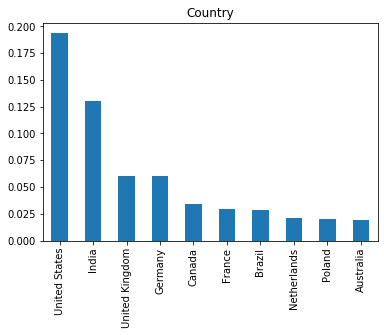

In [13]:
# Where are the participants of the survey from?
country_rows = df_2020_survey.Country.value_counts()

(country_rows[:10]/df_2020_survey.shape[0]).plot(kind="bar");
plt.title("Country");

Check what columns have low amount of null values for possible use in prediction model:

In [15]:
# Which columns have less than 30% missing values?
max_30_perc_missing_cols = set(df_2020_survey.columns[df_2020_survey.isnull().mean() < 0.3])#Provide a set of columns with more than 75% of the values missing
max_30_perc_missing_cols;

In [16]:
# Which columns have more than 30% missing values?
min_30_perc_missing_cols = set(df_2020_survey.columns[df_2020_survey.isnull().mean() > 0.5])#Provide a set of columns with more than 75% of the values missing
min_30_perc_missing_cols;

In [18]:
#The exact proportion of missing values in the Job Satisfaction column
df_2020_survey.DatabaseDesireNextYear.isnull().mean() 

0.3163308046725927

### Findings, which contradict requirements:


- Validity: Not all tweets are dog ratings, some are retweets. 181 Retweets, identied by values in columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`.


### General Findings:

- Only one real numerical column: `ConvertedSalary`. As `Respondent`is just an ID counter



<a id='data_preparation'></a>
## 3. Data Preparation

- Age 2019 and 2020 in int/float.
- Gender is in all surveys

- 2019: `LanguageDesireNextYear`, `DatabaseDesireNextYear`, , `WebFrameDesireNextYear`, `PlatformDesireNextYear`

- 2020: `LanguageDesireNextYear`, `DatabaseDesireNextYear`, `WebframeDesireNextYear`, `PlatformDesireNextYear`

### 3.2. Clean data

### Issue 1:
#### Observe:
- Validity: In the 2020 survey `df_2020_survey` the column `LanguageDesireNextYear` in some cases holds multiple answers per row. A developer can desire to work with one or more languages in the next year. Every, in the survey, existing combination of different languages would be treated as a possible value.

#### Define:
- Drop rows, which can be identified as retweets by non-null values in columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`. Furthermore drop columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`, as not necessary anymore.

#### Code:

In [19]:
# The description for the column
get_description('LanguageDesireNextYear', df_2020_schema)

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [20]:
# A function to count the actual appearence of each value 
def total_count(df, col1, col2, look_for):
    ''' 
    Args:
    df - the pandas dataframe to search in
    col1 - the column name of the column to look through
    col2 - the column to count values from
    look_for - a list of strings for which should be searched in df[col]
    
    Returns:
    new_df - a dataframe with a count for each element in look_for
    '''
    from collections import defaultdict
    new_df = defaultdict(int)
    for val in look_for:
        for row in range(df.shape[0]):
            if val in df[col1][row]:
                new_df[val] += int(df[col2][row])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df
                

In [21]:

# Can not use possible_vals approach as C will be found in C++, C' and Objective-C, same for Java and JavaScript
# Change to search for 

def separate_answers(df, column_of_interest):
    ''' Function takes dataframe and creates a new dataframe with only the column of interest. If there 
    are multiple values per row in the column of interest, the values are separated into extra rows.
    The function returns a dataframe with a count of appearence for each unique value of the column of 
    interest and the associated percentage (relative to length of initial dataframe)
    
    Args:
        df - a dataframe containing at least the column of interest
        column of interest - the name of the column of interest in the dataframe
        
    Returns:
        df_value_count - A dataframe containing the three columns 'column of interest', 'count' and 'percentage'.
        In 'column of interest' are all the unique values, in count the amount of appearences in the initial 
        dataframe and in percentage the relative appearence compared to the amount of rows in the initial dataframe.
    ''' 
 
    # Keep only column of interest
    series = df[column_of_interest]
    series.dropna(inplace=True)
    
    # Make rows with more than one entries to lists
    separated_series = series.apply(lambda x: x.split(';'))

    # Flatten nested objects
    answers_list = []
    for row in separated_series:
        for answer in row:
            answers_list.append(answer.strip())
     
    # Create a set with unique values
    possible_values = set(answers_list)
    
    # Count appearence of each unique value 
    values_with_counter = dict(Counter(answers_list))
    
    # Transform dictionary to dataframe and rename columns appropiatly
    df_value_count = pd.DataFrame.from_dict(values_with_counter, orient='index')
    df_value_count.reset_index(inplace=True)
    df_value_count.rename(columns={'index':column_of_interest, 0:'count'}, inplace=True)
    
    
    # Add column with percentage
    df_value_count.set_index(column_of_interest, inplace=True)
    df_value_count['percentage'] = df_value_count/df.shape[0] 
    df_value_count.reset_index(level=0, inplace=True)

    df_value_count.sort_values(by='percentage', ascending=False, inplace=True)
    #df_value_count.rename(columns={'percentage':column_of_interest+'_percentage', 
    #                               'count':column_of_interest+'_count'}, inplace=True)

    return df_value_count

In [22]:
# Args survey, list of columns to do work

In [23]:
def create_survey_comparison(df19, df20, column, cut, merge):
    '''Funtion creates for a given column a comparison between two dataframes.
    
    Args:
        df19 - datframe of survey 2019
        df20 - dataframe of survey 2020
        column - column which should be compared
        
    Returns:
        survey_comparison - a dataframe containing the comparison of the input column of both input dataframes
    '''
    
    # Separate answers, where there is more than one per row
    df19_separated = separate_answers(df19, column)
    df20_separated = separate_answers(df20, column)
    
    # only keep x=cut values 
    df19_separated = df19_separated[:cut]
    df20_separated = df20_separated[:cut]
     
    if merge:
        # Merge dataframes of 2019 and 2020 to one
        survey_comparison = pd.merge(df19_separated, df20_separated, on=column, 
                                     how='outer', suffixes=('_2019', '_2020'))
    
    else: 
        df19_separated['year'] = 2019
        df20_separated['year'] = 2020
        survey_comparison = df19_separated.append(df20_separated)
    
    return survey_comparison
        

In [26]:
language_worked = create_survey_comparison(df_2019_survey, df_2020_survey, 'LanguageWorkedWith', 10, merge=False)

language_desired = create_survey_comparison(df_2019_survey, df_2020_survey, 'LanguageDesireNextYear', 10, merge=False)

database_worked = create_survey_comparison(df_2019_survey, df_2020_survey, 'DatabaseWorkedWith', 10, merge=False)

database_desired = create_survey_comparison(df_2019_survey, df_2020_survey, 'DatabaseDesireNextYear', 10, merge=False)


platform_worked = create_survey_comparison(df_2019_survey, df_2020_survey, 'PlatformWorkedWith', 10, merge=False)

platform_desired = create_survey_comparison(df_2019_survey, df_2020_survey, 'PlatformDesireNextYear', 10, merge=False)


df_2019_survey.rename(columns={'WebFrameWorkedWith':'WebframeWorkedWith', 
                               'WebFrameDesireNextYear':'WebframeDesireNextYear'}, inplace=True)

webframe_worked = create_survey_comparison(df_2019_survey, df_2020_survey, 'WebframeWorkedWith', 10, merge=False)

webframe_desired = create_survey_comparison(df_2019_survey, df_2020_survey, 'WebframeDesireNextYear', 10, merge=False)



In [25]:
language_desired

,LanguageDesireNextYear,count_2019,percentage_2019,count_2020,percentage_2020
0,JavaScript,44739.0,0.503347,26188.0,0.406261
1,Python,40006.0,0.450097,26682.0,0.413925
2,HTML/CSS,36645.0,0.412284,20771.0,0.322226
3,SQL,33566.0,0.377643,19970.0,0.309800
4,TypeScript,23720.0,0.266868,17150.0,0.266052
5,Java,23508.0,0.264483,13264.0,0.205768
6,C#,22449.0,0.252568,13674.0,0.212128
7,Bash/Shell/PowerShell,21303.0,0.239675,11728.0,0.181939
8,Go,17060.0,0.191938,12605.0,0.195545
9,C++,16856.0,0.189643,NaN,NaN


In [6]:

# Figure 1 — Percentage of use of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(10,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = worked_lang_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most common Programming Languages used in Brazil', size = 16)
plt.show()

SyntaxError: invalid syntax (<ipython-input-6-bc6b73be1fd6>, line 9)

In [110]:
def plot_language(df, cut, year, column_name, value):
    
    df = df[:cut]


    # Set up the matplotlib figure
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_axes([0,0,1,1])

    # plot
    ax.barh(df[column_name],df[value])


    ax.grid()
    plt.xlabel('Percentage of responses containing this programming language', fontsize=14);
    #plt.ylabel('Amount of Tweets with that Dog Name in Data');
    plt.title('Stack Overflow survey ' + year + ' - Language desired to work with next year', fontsize=18);
    plt.show()

    fig.savefig('./Output/'+column_name+'_percentage'+year+'.jpg', bbox_inches='tight')

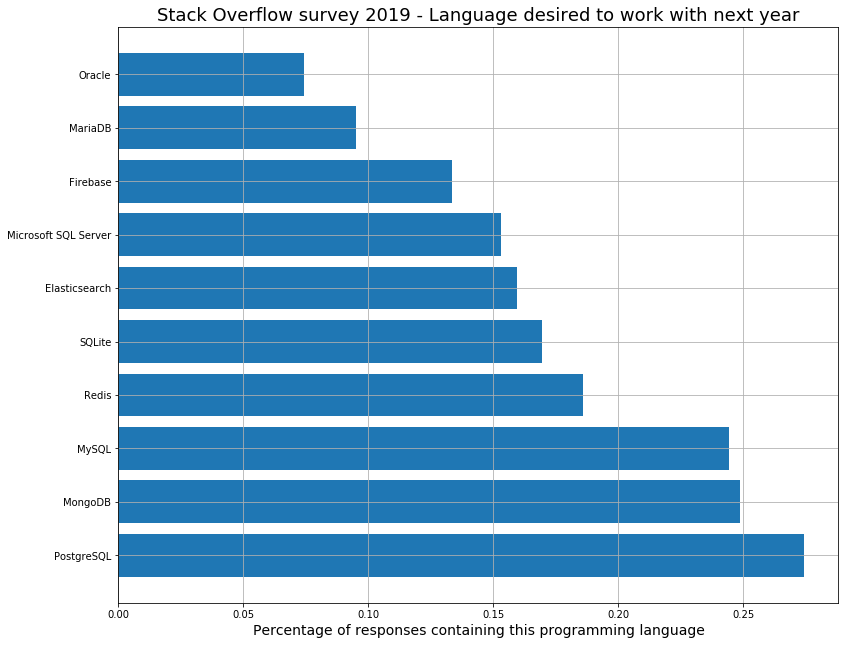

In [112]:
plot_language(database_desired_2020, 10, '2019', 'DatabaseDesireNextYear', 'DatabaseDesireNextYear_percentage')

#### Test:

<a id='modeling'></a>
## 4. Modeling

...

In [ ]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    
    # 1. Drop all the rows with no salaries
    df.dropna(subset=['ConvertedSalary'], axis=0, inplace=True)
 
    # 3. Create y as the Salary column
    y = df.ConvertedSalary 
    
    # 4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    df.drop(['ConvertedSalary', 'Respondent'], axis=1, inplace=True) 

    # 5. For each numeric variable in X, fill the column with the mean value of the column.
    # -> Not necessary here, as there are no numeric values other than ConvertedSalary#
    
    #num_vars = df.select_dtypes(include=['float', 'int']).columns
    #for col in num_vars:
        #df[col].fillna((df[col].mean()), inplace=True)
    
    # 6. Create dummy columns for all the categorical variables in X, drop the original columns
    cat_vars = df.select_dtypes(include=['object']).columns
    for col in cat_vars:
        try:
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)
        except:
            continue        
        
    # 2. Create X as all the columns that are not the Salary column

    X=df
        
    
        
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    

<a id='evaluation'></a>
## 5. Evaluation

...

<a id='deployment'></a>
## 6. Deployment

...